<a href="https://colab.research.google.com/github/Dee-Nwanjah/Data_Science-Portfolio/blob/main/E_commerce_Sales_Dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# ==============================================================================
# SETUP & CSV LOADING
# ==============================================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

# Set style for better looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load data
df = pd.read_csv('ecommerce_customer_data_large.csv')
print("Dataset shape:", df.shape)
print("\nColumns:", df.columns.tolist())
df.head()

Dataset shape: (233992, 13)

Columns: ['Customer ID', 'Purchase Date', 'Product Category', 'Product Price', 'Quantity', 'Total Purchase Amount', 'Payment Method', 'Customer Age', 'Returns', 'Customer Name', 'Age', 'Gender', 'Churn']


,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0.0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0.0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0.0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0.0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0.0


In [ ]:
# ==============================================================================
# EXPLORATION
# ==============================================================================

print("Data types:")
print(df.dtypes)
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])
print(f"\nDate range: {df['Purchase Date'].min()} to {df['Purchase Date'].max()}")
print(f"Unique customers: {df['Customer ID'].nunique()}")
print(f"Unique products: {df['Product Category'].nunique()}")

In [ ]:
# Convert date column to datetime
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

# Create additional date columns for analysis
df['Year'] = df['Purchase Date'].dt.year
df['Month'] = df['Purchase Date'].dt.month
df['Day'] = df['Purchase Date'].dt.day
df['Weekday'] = df['Purchase Date'].dt.day_name()


print("New columns added!")
display(df.head())

METRICES & VISUALIZATIONS

In [5]:
# Calculate key metrics
total_revenue = df['Total Purchase Amount'].sum()
total_transactions = df.shape[0] # Count the number of rows as transactions
total_customers = df['Customer ID'].nunique()
avg_order_value = total_revenue / total_transactions
total_products_sold = df['Quantity'].sum()

# Ensure 'Purchase Date' is in datetime format before calculating the difference
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])
average_customers_per_day = total_customers / (df['Purchase Date'].max() - df['Purchase Date'].min()).days

print("=== KEY PERFORMANCE INDICATORS ===")
print(f"💰 Total Revenue: ${total_revenue:,.2f}")
print(f"🛒 Total Transactions: {total_transactions:,}")
print(f"👥 Total Customers: {total_customers:,}")
print(f"📈 Average Order Value: ${avg_order_value:.2f}")
print(f"📦 Total Products Sold: {total_products_sold:,}")
print(f"👥 Average Daily Customers: {average_customers_per_day:.2f}")

=== KEY PERFORMANCE INDICATORS ===
💰 Total Revenue: $637,850,344.00
🛒 Total Transactions: 233,992
👥 Total Customers: 44,331
📈 Average Order Value: $2725.95
📦 Total Products Sold: 703,375
👥 Average Daily Customers: 32.81


In [7]:
# Monthly revenue trend
# Ensure 'Purchase Date' is in datetime format
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

# Create Year and Month columns
df['Year'] = df['Purchase Date'].dt.year
df['Month'] = df['Purchase Date'].dt.month

monthly_revenue = df.groupby(['Year', 'Month'])['Total Purchase Amount'].sum().reset_index()
monthly_revenue['Date'] = pd.to_datetime(monthly_revenue[['Year', 'Month']].assign(day=1))

print("\nMonthly Revenue:")
print(monthly_revenue)


Monthly Revenue:
    Year  Month  Total Purchase Amount       Date
0   2020      1               14581468 2020-01-01
1   2020      2               13810657 2020-02-01
2   2020      3               14467643 2020-03-01
3   2020      4               14134387 2020-04-01
4   2020      5               14555567 2020-05-01
5   2020      6               14140771 2020-06-01
6   2020      7               14643781 2020-07-01
7   2020      8               15181244 2020-08-01
8   2020      9               14163572 2020-09-01
9   2020     10               14824590 2020-10-01
10  2020     11               14308719 2020-11-01
11  2020     12               14510395 2020-12-01
12  2021      1               14366008 2021-01-01
13  2021      2               13385814 2021-02-01
14  2021      3               14279357 2021-03-01
15  2021      4               14000858 2021-04-01
16  2021      5               14703233 2021-05-01
17  2021      6               14164904 2021-06-01
18  2021      7               14

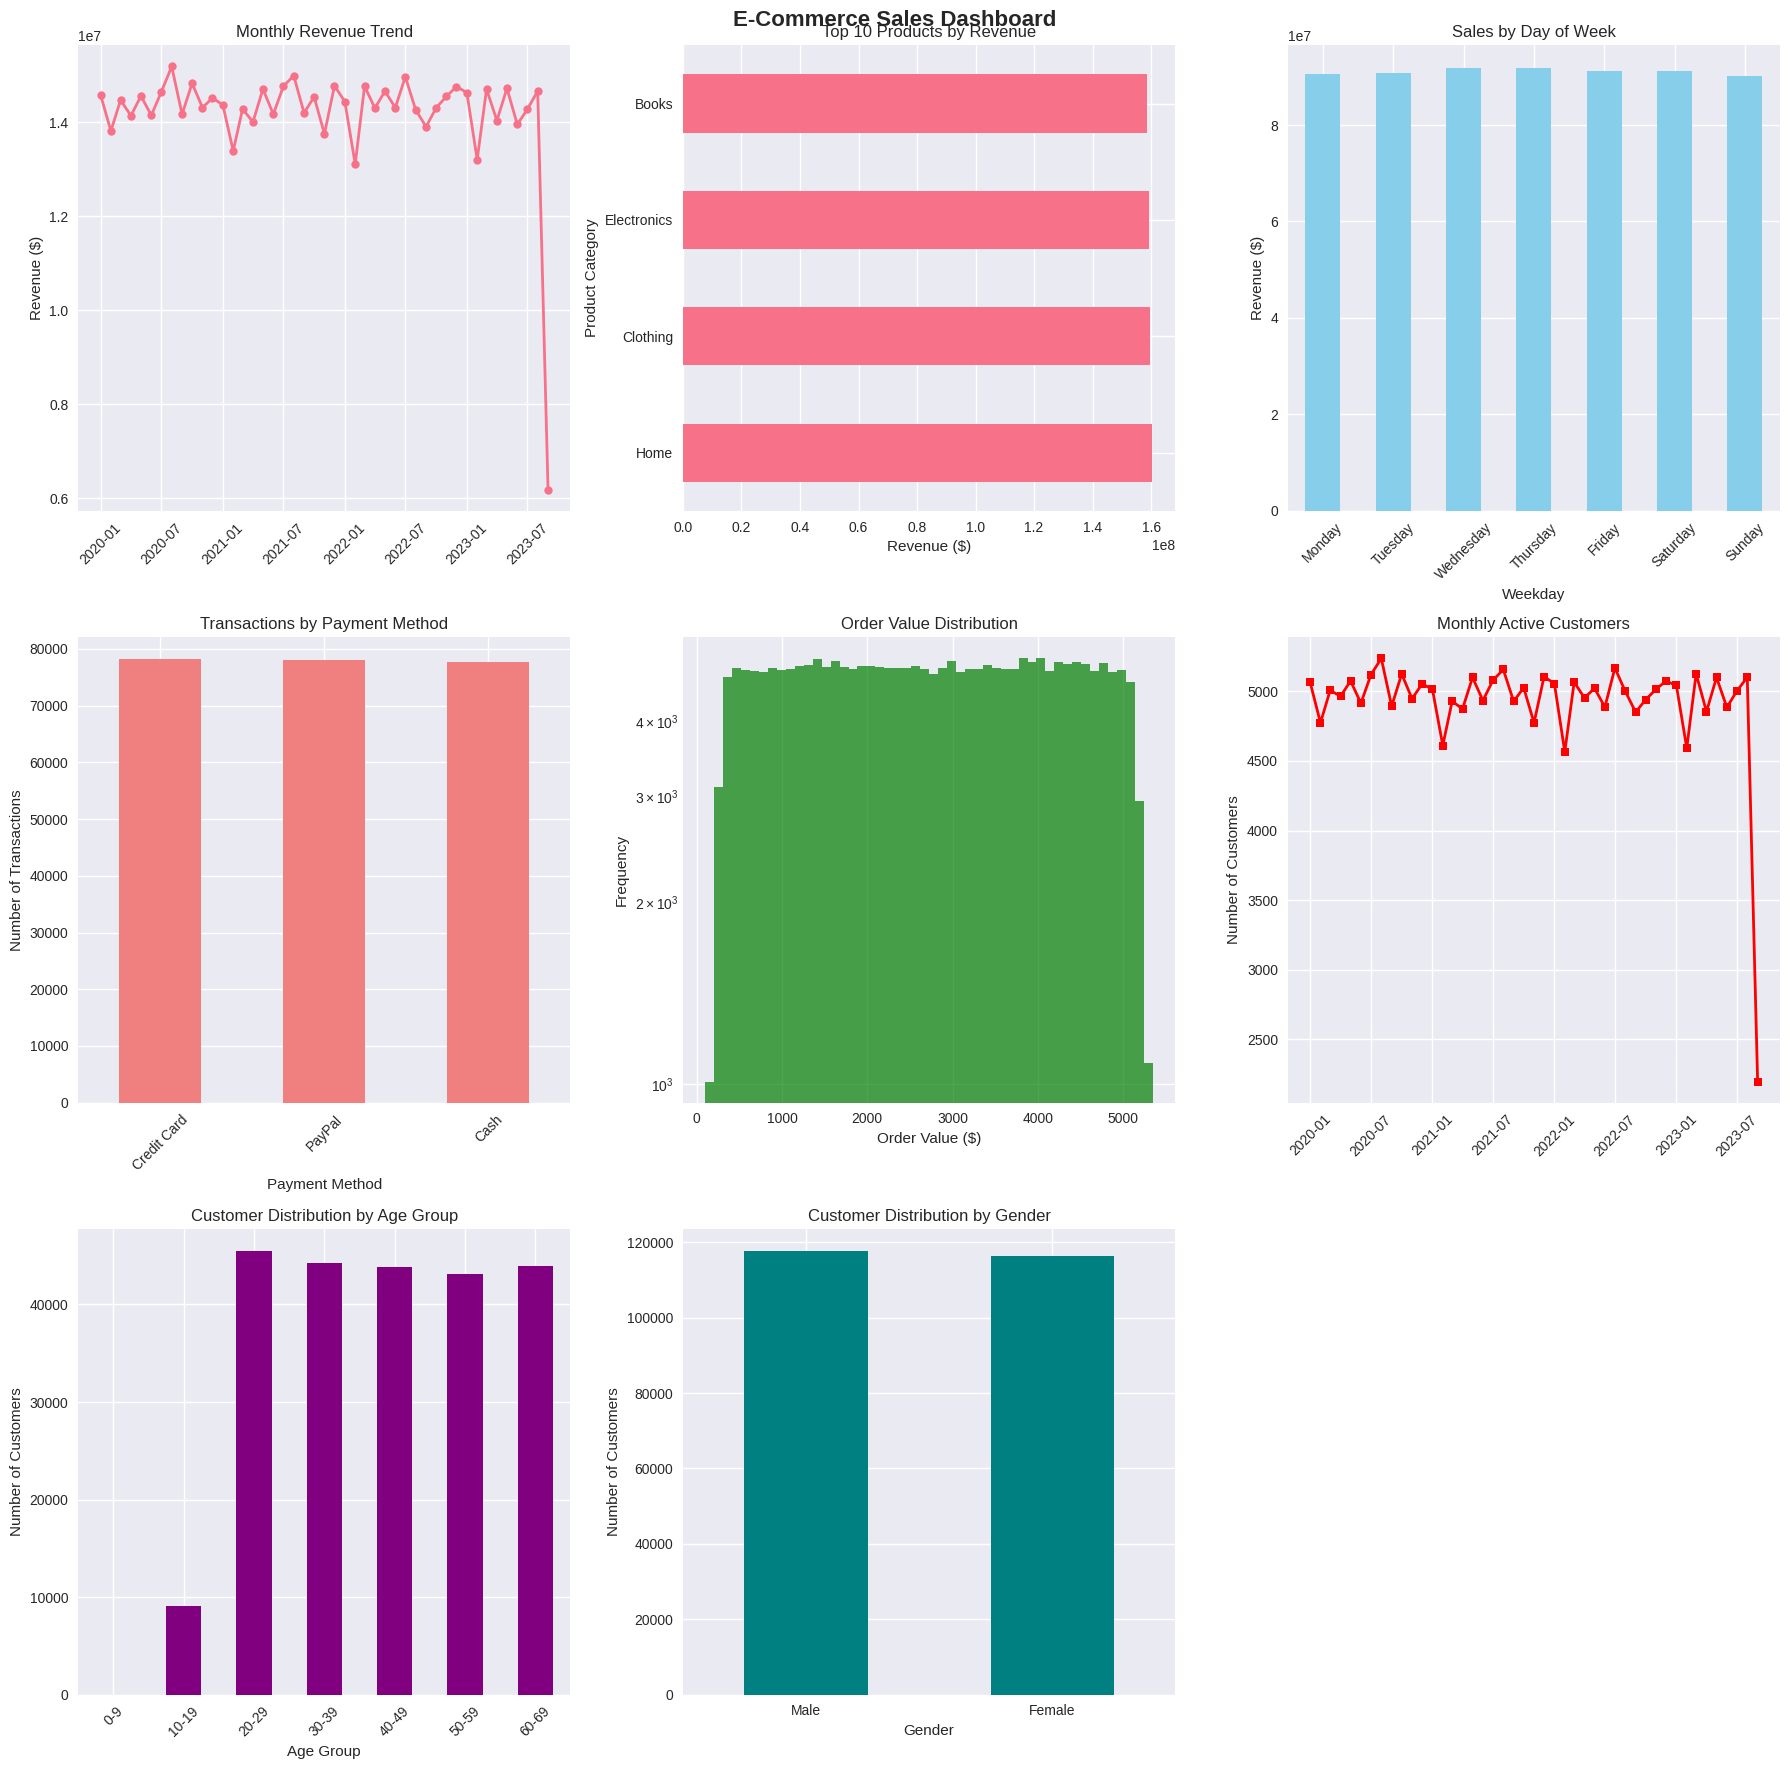

In [9]:
# Create a comprehensive dashboard with a 3x3 layout
fig, axes = plt.subplots(3, 3, figsize=(18, 18))
fig.suptitle('E-Commerce Sales Dashboard', fontsize=16, fontweight='bold')

# Flatten the axes array for easier indexing
axes = axes.flatten()

# 1. Monthly Revenue Trend
axes[0].plot(monthly_revenue['Date'], monthly_revenue['Total Purchase Amount'],
                marker='o', linewidth=2, markersize=6)
axes[0].set_title('Monthly Revenue Trend')
axes[0].set_ylabel('Revenue ($)')
axes[0].tick_params(axis='x', rotation=45)

# 2. Top 10 Products by Revenue
product_revenue = df.groupby('Product Category')['Total Purchase Amount'].sum().nlargest(10)
product_revenue.plot(kind='barh', ax=axes[1])
axes[1].set_title('Top 10 Products by Revenue')
axes[1].set_xlabel('Revenue ($)')

# 3. Sales by Day of Week
# Ensure 'Purchase Date' is in datetime format and create Weekday column
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])
df['Weekday'] = df['Purchase Date'].dt.day_name()

daily_sales = df.groupby('Weekday')['Total Purchase Amount'].sum()
# Reorder days properly
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_sales = daily_sales.reindex(day_order)
daily_sales.plot(kind='bar', ax=axes[2], color='skyblue')
axes[2].set_title('Sales by Day of Week')
axes[2].set_ylabel('Revenue ($)')
axes[2].tick_params(axis='x', rotation=45)

# 4. Transactions by Payment Method
payment_method_counts = df['Payment Method'].value_counts()
payment_method_counts.plot(kind='bar', ax=axes[3], color='lightcoral')
axes[3].set_title('Transactions by Payment Method')
axes[3].set_ylabel('Number of Transactions')
axes[3].tick_params(axis='x', rotation=45)

# 5. Order Value Distribution
axes[4].hist(df.groupby(df.index)['Total Purchase Amount'].sum(), bins=50, alpha=0.7, color='green')
axes[4].set_title('Order Value Distribution')
axes[4].set_xlabel('Order Value ($)')
axes[4].set_ylabel('Frequency')
axes[4].set_yscale('log')

# 6. Monthly Customer Count
# Ensure 'Purchase Date' is in datetime format and create Year and Month columns for this plot
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])
df['Year'] = df['Purchase Date'].dt.year
df['Month'] = df['Purchase Date'].dt.month
monthly_customers = df.groupby(['Year', 'Month'])['Customer ID'].nunique().reset_index()
monthly_customers['Date'] = pd.to_datetime(monthly_customers[['Year', 'Month']].assign(day=1))
axes[5].plot(monthly_customers['Date'], monthly_customers['Customer ID'],
                marker='s', linewidth=2, markersize=6, color='red')
axes[5].set_title('Monthly Active Customers')
axes[5].set_ylabel('Number of Customers')
axes[5].tick_params(axis='x', rotation=45)

# 7. Customer Distribution by Age Group
# Define age bins and labels
age_bins = list(range(0, df['Customer Age'].max() + 10, 10))
age_labels = [f'{i}-{i+9}' for i in age_bins[:-1]]
df['Age Group'] = pd.cut(df['Customer Age'], bins=age_bins, labels=age_labels, right=False)
customer_age_distribution = df['Age Group'].value_counts().sort_index()
customer_age_distribution.plot(kind='bar', ax=axes[6], color='purple')
axes[6].set_title('Customer Distribution by Age Group')
axes[6].set_xlabel('Age Group')
axes[6].set_ylabel('Number of Customers')
axes[6].tick_params(axis='x', rotation=45)

# 8. Customer Distribution by Gender
customer_gender_distribution = df['Gender'].value_counts()
customer_gender_distribution.plot(kind='bar', ax=axes[7], color='teal')
axes[7].set_title('Customer Distribution by Gender')
axes[7].set_xlabel('Gender')
axes[7].set_ylabel('Number of Customers')
axes[7].tick_params(axis='x', rotation=0)

# Hide the last empty subplot
fig.delaxes(axes[8])

plt.tight_layout()
plt.show()

In [10]:
# Customer segmentation analysis
customer_metrics = df.groupby('Customer ID').agg(
    CustomerName=('Customer Name', 'first'), # Include customer name
    OrderCount=('Purchase Date', 'nunique'),  # Number of orders
    TotalSpent=('Total Purchase Amount', 'sum'),    # Total spent
    LastPurchase=('Purchase Date', 'max')     # Last purchase date
)

# Calculate days since last purchase
customer_metrics['DaysSinceLastPurchase'] = (datetime.now() - customer_metrics['LastPurchase']).dt.days

print("=== CUSTOMER SEGMENTATION ===")
print("\nTop 10 Customers by Total Spent:")
print(customer_metrics.nlargest(10, 'TotalSpent')[['CustomerName', 'OrderCount', 'TotalSpent']])

# Simple customer segments
def segment_customer(row):
    if row['TotalSpent'] > 1000 and row['OrderCount'] > 5:
        return 'VIP'
    elif row['TotalSpent'] > 500:
        return 'High Value'
    elif row['OrderCount'] > 3:
        return 'Frequent'
    else:
        return 'Regular'

customer_metrics['Segment'] = customer_metrics.apply(segment_customer, axis=1)
print("\nCustomer Segments:")
print(customer_metrics['Segment'].value_counts())

=== CUSTOMER SEGMENTATION ===

Top 10 Customers by Total Spent:
                  CustomerName  OrderCount  TotalSpent
Customer ID                                           
39895        Reginald Gonzales          15       50659
39717            Joseph Kaiser          14       50496
48382            Katelyn Clark          17       50179
6633             Andre Spencer          13       48499
49743           Bryan Gonzalez          14       47015
22821           Larry Phillips          12       46939
24468            Antonio Smith          14       46683
13805          Timothy Proctor          15       46567
539               Brad Sanford          13       46390
19960           Patrick Gamble          14       46255

Customer Segments:
Segment
High Value    25561
VIP           18728
Regular          42
Name: count, dtype: int64
